<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/notebooks/IHP_SG13G2_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IHP SG13G2 V<sub>GS</sub> sweep

# Tool setup

In [ ]:
# clone pdk
!git clone https://github.com/IHP-GmbH/IHP-Open-PDK.git

fatal: destination path 'IHP-Open-PDK' already exists and is not an empty directory.


In [ ]:
# install openvaf and compile models
!wget https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz
!tar -xf openvaf_23_5_0_linux_amd64.tar.gz
!./openvaf ./IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/openvaf/psp103_nqs.va
!cp ./IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/openvaf/psp103_nqs.osdi .

--2023-12-10 01:38:44--  https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz
Resolving openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)... 104.18.12.192, 104.18.13.192, 2606:4700::6812:cc0, ...
Connecting to openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)|104.18.12.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from openva.fra1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 54596847 (52M) [application/gzip]
Saving to: ‘openvaf_23_5_0_linux_amd64.tar.gz.2’

openvaf_23_5_0_linu 100%[===================>]  52.07M   136MB/s    in 0.4s    

2023-12-10 01:38:45 (136 MB/s) - ‘openvaf_23_5_0_linux_amd64.tar.gz.2’ saved [54596847/54596847]

Finished building psp103_nqs.va in 22.10s


In [ ]:
# clone ngspice
!apt install bison flex libx11-dev libx11-6 libxaw7-dev libreadline6-dev autoconf libtool automake -y
!git clone https://git.code.sf.net/p/ngspice/ngspice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libreadline-dev' instead of 'libreadline6-dev'
autoconf is already the newest version (2.71-2).
automake is already the newest version (1:1.16.5-1.3).
bison is already the newest version (2:3.8.2+dfsg-1build1).
flex is already the newest version (2.6.4-8build2).
libreadline-dev is already the newest version (8.1.2-1).
libtool is already the newest version (2.4.6-15build2).
libxaw7-dev is already the newest version (2:1.0.14-1).
libx11-6 is already the newest version (2:1.7.5-1ubuntu0.3).
libx11-dev is already the newest version (2:1.7.5-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
fatal: destination path 'ngspice' already exists and is not an empty directory.


In [ ]:
# compile ngspice
!cd ngspice && ./compile_linux.sh

Running libtoolize
libtoolize: putting auxiliary files in '.'.
libtoolize: copying file './ltmain.sh'
libtoolize: putting macros in AC_CONFIG_MACRO_DIRS, 'm4'.
libtoolize: copying file 'm4/libtool.m4'
libtoolize: copying file 'm4/ltoptions.m4'
libtoolize: copying file 'm4/ltsugar.m4'
libtoolize: copying file 'm4/ltversion.m4'
libtoolize: copying file 'm4/lt~obsolete.m4'
Running aclocal 
Running autoheader
Running automake -Wall --copy --add-missing
configure.ac:46: installing './ar-lib'
configure.ac:42: installing './compile'
configure.ac:44: installing './config.guess'
configure.ac:44: installing './config.sub'
configure.ac:37: installing './install-sh'
configure.ac:37: installing './missing'
src/Makefile.am: installing './depcomp'
configure.ac: installing './ylwrap'
Running autoconf
configure.ac:967: warning: The macro `AC_TRY_LINK' is obsolete.
configure.ac:967: You should run autoupdate.
./lib/autoconf/general.m4:2920: AC_TRY_LINK is expanded from...
configure.ac:967: the top level

# Simulation

In [ ]:
%%writefile .spiceinit
set ngbehavior=hs

Overwriting .spiceinit


In [ ]:
%%writefile netlist.spice
* NMOS & PMOS VGS sweep

.lib "IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib" mos_tt

.param width=5u
X1 dn gn 0 0 sg13_lv_nmos w=width l=0.13u
vd    dn 0        dc   0.9
vg    gn 0        dc   0.9
X2 dp gp 0 0 sg13_lv_pmos w=width l=0.13u
ed    dp 0 dn 0 -1
eg    gp 0 gn 0 -1
.op
.option post brief nomod
.end

.control
pre_osdi ./psp103_nqs.osdi
save @n.x1.nsg13_lv_nmos[gm] @n.x1.nsg13_lv_nmos[ids] @n.x1.nsg13_lv_nmos[cgg] @n.x2.nsg13_lv_pmos[gm] @n.x2.nsg13_lv_pmos[ids] @n.x2.nsg13_lv_pmos[cgg]
dc vg 0 1.3 0.01
wrdata output.txt @n.x1.nsg13_lv_nmos[gm] @n.x1.nsg13_lv_nmos[ids] @n.x1.nsg13_lv_nmos[cgg] @n.x2.nsg13_lv_pmos[gm] @n.x2.nsg13_lv_pmos[ids] @n.x2.nsg13_lv_pmos[cgg]
.endc

Overwriting netlist.spice


In [ ]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs


Circuit: * nmos & pmos vgs sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver

No. of Data Rows : 131
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver

No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	n.x1.nsg13_lv_nmos#implicit_equation_6   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(SPLINE7)   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(RES7)    0.000000e+00
	n.x1.nsg13_lv_nmos#implicit_equation_5   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(SPLINE6)   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(RES6)    0.000000e+00
	n.x1.nsg13_lv_nmos#implicit_equation_4   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(SPLINE5)   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(RES5)    0.000000e+00
	n.x1.nsg13_lv_nmos#implicit_equation_3   0.000000e+00
	n.x1.nsg13_lv_nmos#flow(SPLINE4)   0.000000e+00
	n.x1.nsg13_lv_nm

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vgs", "gmn", "", "idn", "", "cggn", "", "gmp", "", "idp", "", "cggp"]
df['gm_id_n'] = df['gmn']/df['idn']
df['fT_n'] = df['gmn']/df['cggn']/2/math.pi
df['gm_id_p'] = df['gmp']/df['idp']
df['fT_p'] = df['gmp']/df['cggp']/2/math.pi

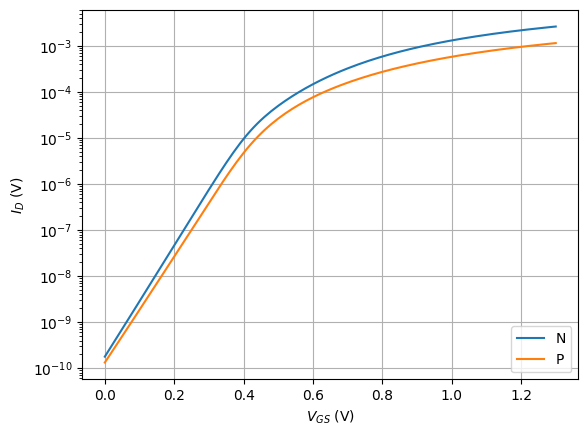

In [ ]:
plt.semilogy(df['vgs'], df['idn'], label="N")
plt.semilogy(df['vgs'], df['idp'], label="P")
plt.xlabel("$V_{GS}$ (V)")
plt.ylabel("$I_{D}$ (V)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

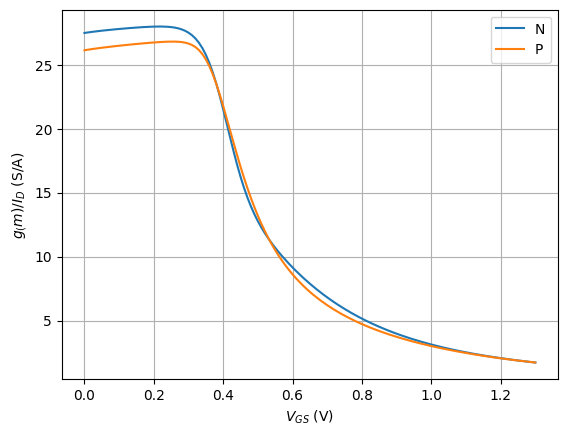

In [ ]:
plt.plot(df['vgs'], df['gm_id_n'], label="N")
plt.plot(df['vgs'], df['gm_id_p'], label="P")
plt.xlabel("$V_{GS}$ (V)")
plt.ylabel("$g_(m)/I_{D}$ (S/A)")
plt.legend(loc="upper right")
plt.grid()
plt.show()

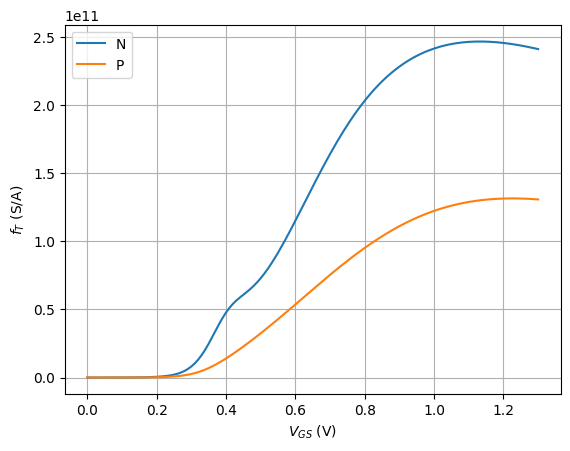

In [ ]:
plt.plot(df['vgs'], df['fT_n'], label="N")
plt.plot(df['vgs'], df['fT_p'], label="P")
plt.xlabel("$V_{GS}$ (V)")
plt.ylabel("$f_T$ (S/A)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

Strange kink in NMOS fT. Also, the peak value is too large for this technology (?), probably because I am not including cgsol and cgdol. On the other hand, why are these so large?




In [ ]:
#cgsol           2.63377e-15           3.19575e-15
#cgdol           2.42174e-15           3.02492e-15